# Cloud Data Engineering
# Title: Analyzing Cloud Resource Usage and Optimizing Cost Across Services and Regions

Simulate storing this dataset in Google Cloud Storage (GCS).

## 0.0 Requirements

Requirements:

a. Use matplotlib or seaborn for visualizations.

b. Demonstrate how to connect Colab to Google Cloud Storage.

c. Provide a short report (as markdown or notebook cells) with insights and recommendations.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/Capaciti Data Analytics and Engineering/cloud_data_engineering_dataset.csv'
data = pd.read_csv(path)

## 0.1 Data Understanding

In [ ]:
data.head()

,CustomerID,CloudService,Region,UsageHours,StorageGB,CostUSD,UsageDate
0,CUST0001,Vertex AI,us-central1,4.69,59.89,1.90,2023-08-01
1,CUST0002,Dataproc,southamerica-east1,30.10,38.40,5.28,2023-09-22
2,CUST0003,Cloud Functions,europe-west1,13.17,18.52,2.35,2023-07-01
3,CUST0004,BigQuery,europe-west1,9.13,84.05,3.05,2023-09-29
4,CUST0005,Vertex AI,asia-southeast1,1.70,57.72,1.41,2023-12-17


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CustomerID    500 non-null    object 
 1   CloudService  500 non-null    object 
 2   Region        500 non-null    object 
 3   UsageHours    500 non-null    float64
 4   StorageGB     500 non-null    float64
 5   CostUSD       500 non-null    float64
 6   UsageDate     500 non-null    object 
dtypes: float64(3), object(4)
memory usage: 27.5+ KB


In [ ]:
data.describe()

,UsageHours,StorageGB,CostUSD
count,500.000000,500.000000,500.000000
mean,10.043160,47.034940,2.447160
std,9.740243,48.546228,1.720599
min,0.050000,0.230000,0.050000
25%,2.762500,13.010000,1.130000
50%,7.200000,31.915000,2.130000
75%,14.112500,64.792500,3.325000
max,49.570000,408.620000,8.500000


## 1. Analyze the average cost per service type and region.

In [ ]:
cost_by_service_region = data.groupby(['CloudService', 'Region'])['CostUSD'].mean()
cost_by_service_region

CloudService     Region            
BigQuery         asia-southeast1       2.408333
                 europe-west1          2.284500
                 southamerica-east1    2.032917
                 us-central1           2.027500
Cloud Functions  asia-southeast1       2.155652
                 europe-west1          2.368235
                 southamerica-east1    3.183333
                 us-central1           1.987500
Compute          asia-southeast1       2.419000
                 europe-west1          2.605789
                 southamerica-east1    2.564375
                 us-central1           2.539524
Dataproc         asia-southeast1       2.419000
                 europe-west1          2.162593
                 southamerica-east1    2.496923
                 us-central1           2.683750
Pub/Sub          asia-southeast1       2.098889
                 europe-west1          2.351739
                 southamerica-east1    2.503889
                 us-central1           3.171579
Storage          asia-southeast1       2.457222
                 europe-west1          2.039412
                 southamerica-east1    2.990909
                 us-central1           2.624800
Vertex AI        asia-southeast1       2.480476
                 europe-west1          2.485000
                 southamerica-east1    2.768421
                 us-central1           2.494000
Name: CostUSD, dtype: float64

In [ ]:
unstacked_ = cost_by_service_region.unstack()
unstacked_

Region,asia-southeast1,europe-west1,southamerica-east1,us-central1
CloudService,,,,
BigQuery,2.408333,2.284500,2.032917,2.027500
Cloud Functions,2.155652,2.368235,3.183333,1.987500
Compute,2.419000,2.605789,2.564375,2.539524
Dataproc,2.419000,2.162593,2.496923,2.683750
Pub/Sub,2.098889,2.351739,2.503889,3.171579
Storage,2.457222,2.039412,2.990909,2.624800
Vertex AI,2.480476,2.485000,2.768421,2.494000


In [ ]:
cost_by_service = data.groupby(['CloudService'])['CostUSD'].mean()
cost_by_service


,CostUSD
CloudService,
BigQuery,2.164167
Cloud Functions,2.442714
Compute,2.529605
Dataproc,2.393636
Pub/Sub,2.528205
Storage,2.498873
Vertex AI,2.565970


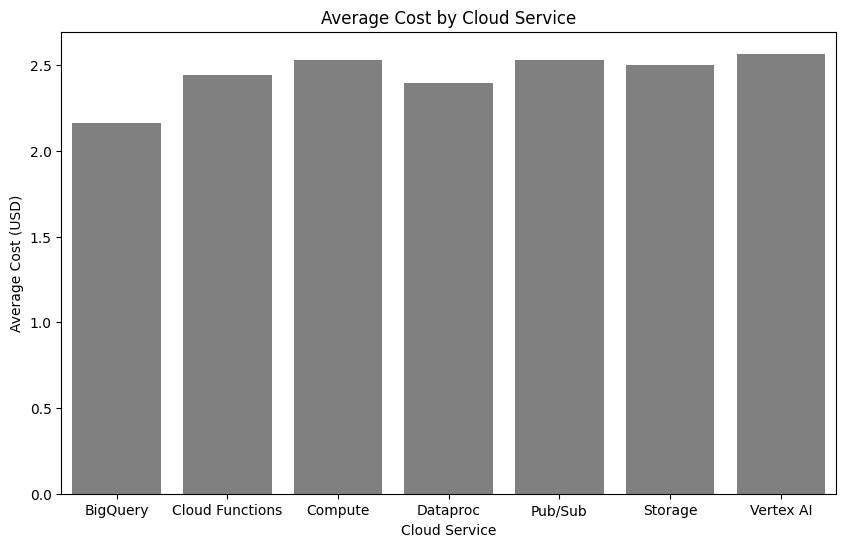

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=cost_by_service.index, y=cost_by_service.values, color = 'grey')
plt.xlabel('Cloud Service')
plt.ylabel('Average Cost (USD)')
plt.title('Average Cost by Cloud Service')
plt.show()

In [ ]:
cost_by_region = data.groupby(['Region'])['CostUSD'].mean()
cost_by_region


,CostUSD
Region,
asia-southeast1,2.337295
europe-west1,2.314296
southamerica-east1,2.606303
us-central1,2.547177


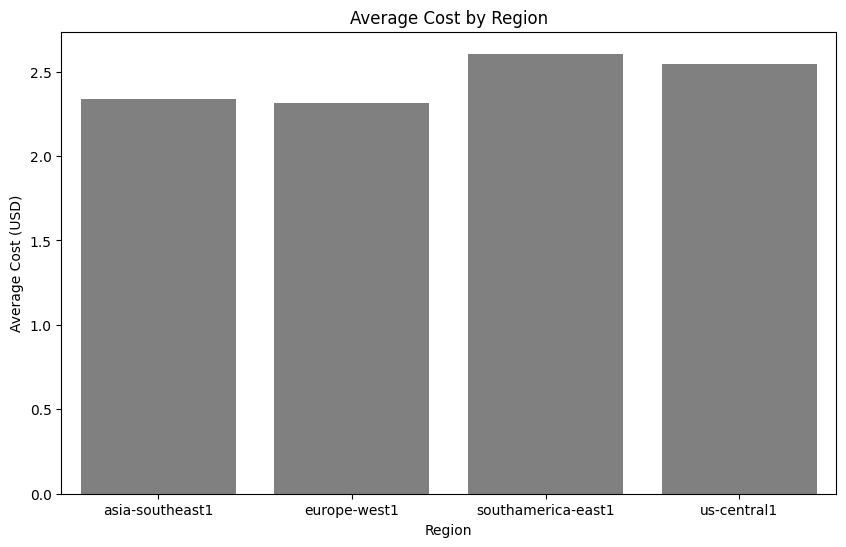

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=cost_by_region.index, y=cost_by_region.values, color = 'grey')
plt.xlabel('Region')
plt.ylabel('Average Cost (USD)')
plt.title('Average Cost by Region')
plt.show()


## 2. Determine peak usage periods across different services.

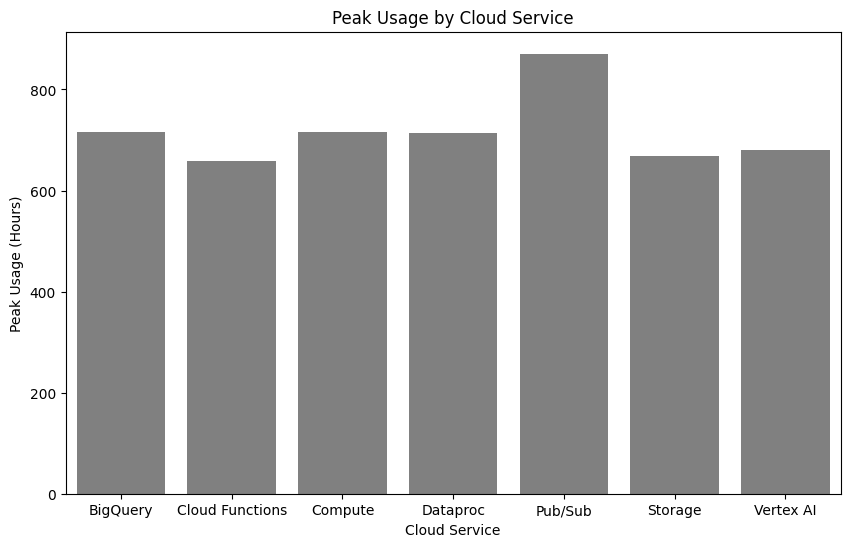

In [ ]:
peak_usage = data.groupby(['CloudService'])['UsageHours'].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=peak_usage.index, y=peak_usage.values, color = 'grey')
plt.xlabel('Cloud Service')
plt.ylabel('Peak Usage (Hours)')
plt.title('Peak Usage by Cloud Service')
plt.show()

## 3. Visualize cost vs. usage hours and storage used vs. cost.

In [ ]:
data['CostUSD'].mean()

np.float64(2.44716)

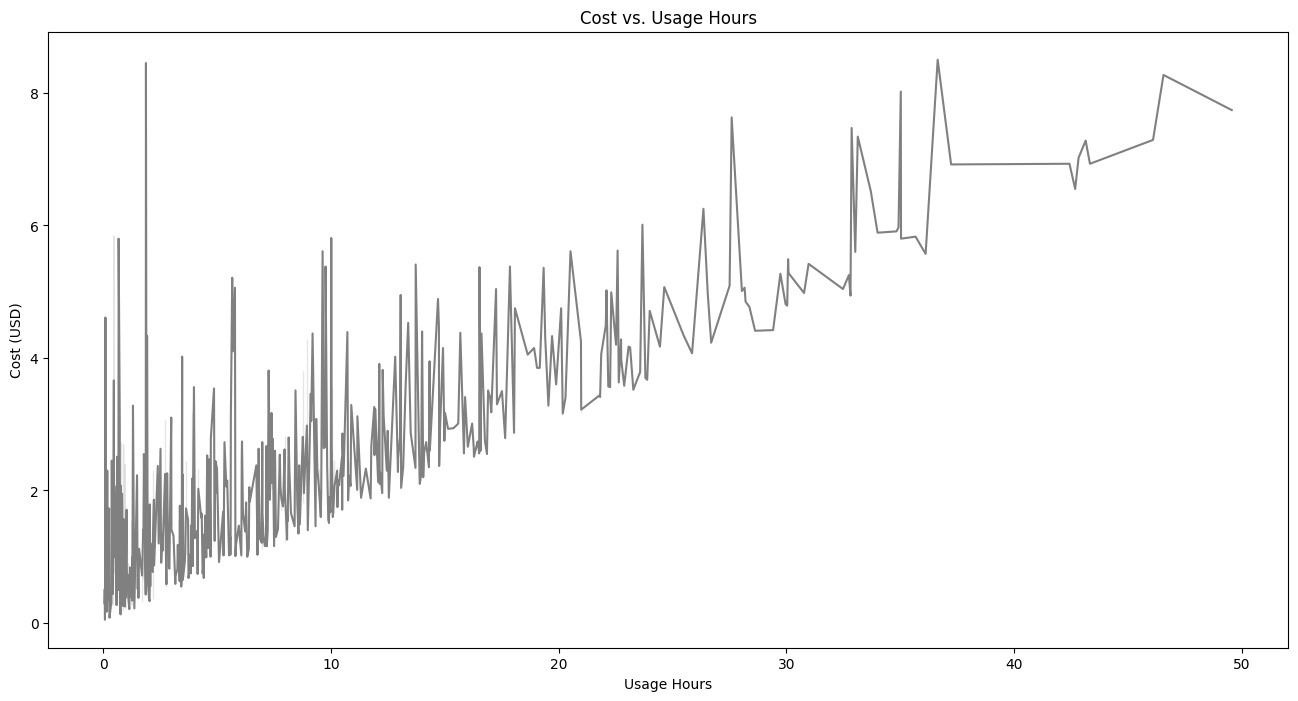

In [ ]:
plt.figure(figsize=(16, 8))
sns.lineplot(x='UsageHours', y='CostUSD', data=data, color = 'grey')
plt.title('Cost vs. Usage Hours')
plt.xlabel('Usage Hours')
plt.ylabel('Cost (USD)')
plt.show()

In [ ]:
data.columns

Index(['CustomerID', 'CloudService', 'Region', 'UsageHours', 'StorageGB',
       'CostUSD', 'UsageDate'],
      dtype='object')

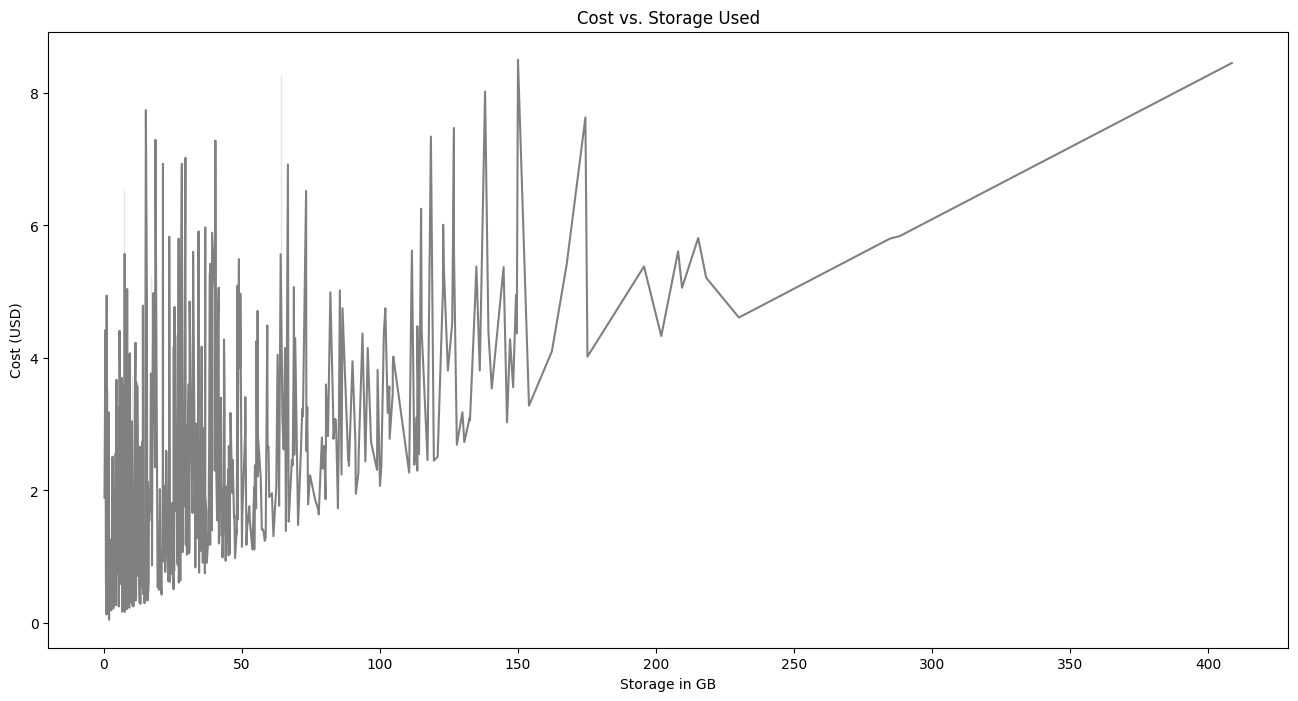

In [ ]:
plt.figure(figsize=(16, 8))
sns.lineplot(x='StorageGB', y='CostUSD', data=data, color = 'grey')
plt.title('Cost vs. Storage Used')
plt.xlabel('Storage in GB')
plt.ylabel('Cost (USD)')
plt.show()

## 4. Suggest optimization techniques for cost reduction.